#### 주문 데이터 생성

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

In [2]:
# 시드 고정
random.seed(42)
np.random.seed(42)

# 고객 수 및 주문 수
num_customers = 500
num_orders = 5000

# 고객 ID 목록
customer_ids = [f"C{str(i).zfill(4)}" for i in range(1, num_customers + 1)]

# 날짜 설정
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)

# 카테고리, 디바이스, 채널 리스트
product_categories = ['Electronics', 'Fashion', 'Beauty', 'Grocery', 'Books', 'Sports']
devices = ['Mobile', 'Desktop', 'Tablet']
channels = ['Website', 'App', 'Offline']

In [3]:
# 주문 데이터 생성
orders = []
for _ in range(num_orders):
    cust_id = random.choice(customer_ids)
    order_date = start_date + timedelta(days=np.random.randint(0, (end_date - start_date).days))
    amount = round(np.random.exponential(scale=100), 2)
    category = random.choice(product_categories)
    device = random.choices(devices, weights=[0.6, 0.3, 0.1])[0]
    discount_used = random.choices([0, 1], weights=[0.7, 0.3])[0]
    channel = random.choices(channels, weights=[0.5, 0.4, 0.1])[0]

    orders.append([
        cust_id, order_date, amount, category, device, discount_used, channel
    ])

# 데이터프레임 구성
df_orders = pd.DataFrame(orders, columns=[
    "customer_id", "order_date", "amount", "category", "device", "discount_used", "channel"
])

# 날짜 타입 변환
df_orders["order_date"] = pd.to_datetime(df_orders["order_date"])

# 결과 확인
print(df_orders.head())

  customer_id order_date  amount     category   device  discount_used  channel
0       C0328 2022-04-13  159.23  Electronics   Mobile              0  Website
1       C0378 2022-09-28  131.67  Electronics  Desktop              1  Website
2       C0217 2023-12-02   90.84  Electronics   Mobile              0      App
3       C0014 2022-05-02   16.96        Books   Mobile              0      App
4       C0113 2022-11-27   61.48      Grocery   Mobile              1  Website


In [4]:
df_orders

,customer_id,order_date,amount,category,device,discount_used,channel
0,C0328,2022-04-13,159.23,Electronics,Mobile,0,Website
1,C0378,2022-09-28,131.67,Electronics,Desktop,1,Website
2,C0217,2023-12-02,90.84,Electronics,Mobile,0,App
3,C0014,2022-05-02,16.96,Books,Mobile,0,App
4,C0113,2022-11-27,61.48,Grocery,Mobile,1,Website
...,...,...,...,...,...,...,...
4995,C0313,2023-02-28,283.25,Grocery,Desktop,0,Website
4996,C0387,2023-01-17,20.56,Beauty,Mobile,0,App
4997,C0457,2023-11-05,516.52,Sports,Mobile,0,Website
4998,C0392,2022-10-04,15.00,Grocery,Mobile,1,App


#### 고객 구매 패턴확인 (지난 내용)

In [5]:
import matplotlib.pyplot as plt

df_orders['year_month']=df_orders['order_date'].dt.to_period('M')
df_orders['year_week']=df_orders['order_date'].dt.strftime('%Y-%U')
df_orders['weekday']=df_orders['order_date'].dt.dayofweek # 0 monday
weekday_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

## 전체 집계
total_monthly=df_orders.groupby('year_month').size().reset_index(name='total_orders')
total_weekly=df_orders.groupby('year_week').size().reset_index(name='total_orders')
weekday_counts=df_orders.groupby('weekday').size().reindex(range(7), fill_value = 0).reset_index(name='total_orders')
weekday_counts['weekday_label'] = weekday_labels

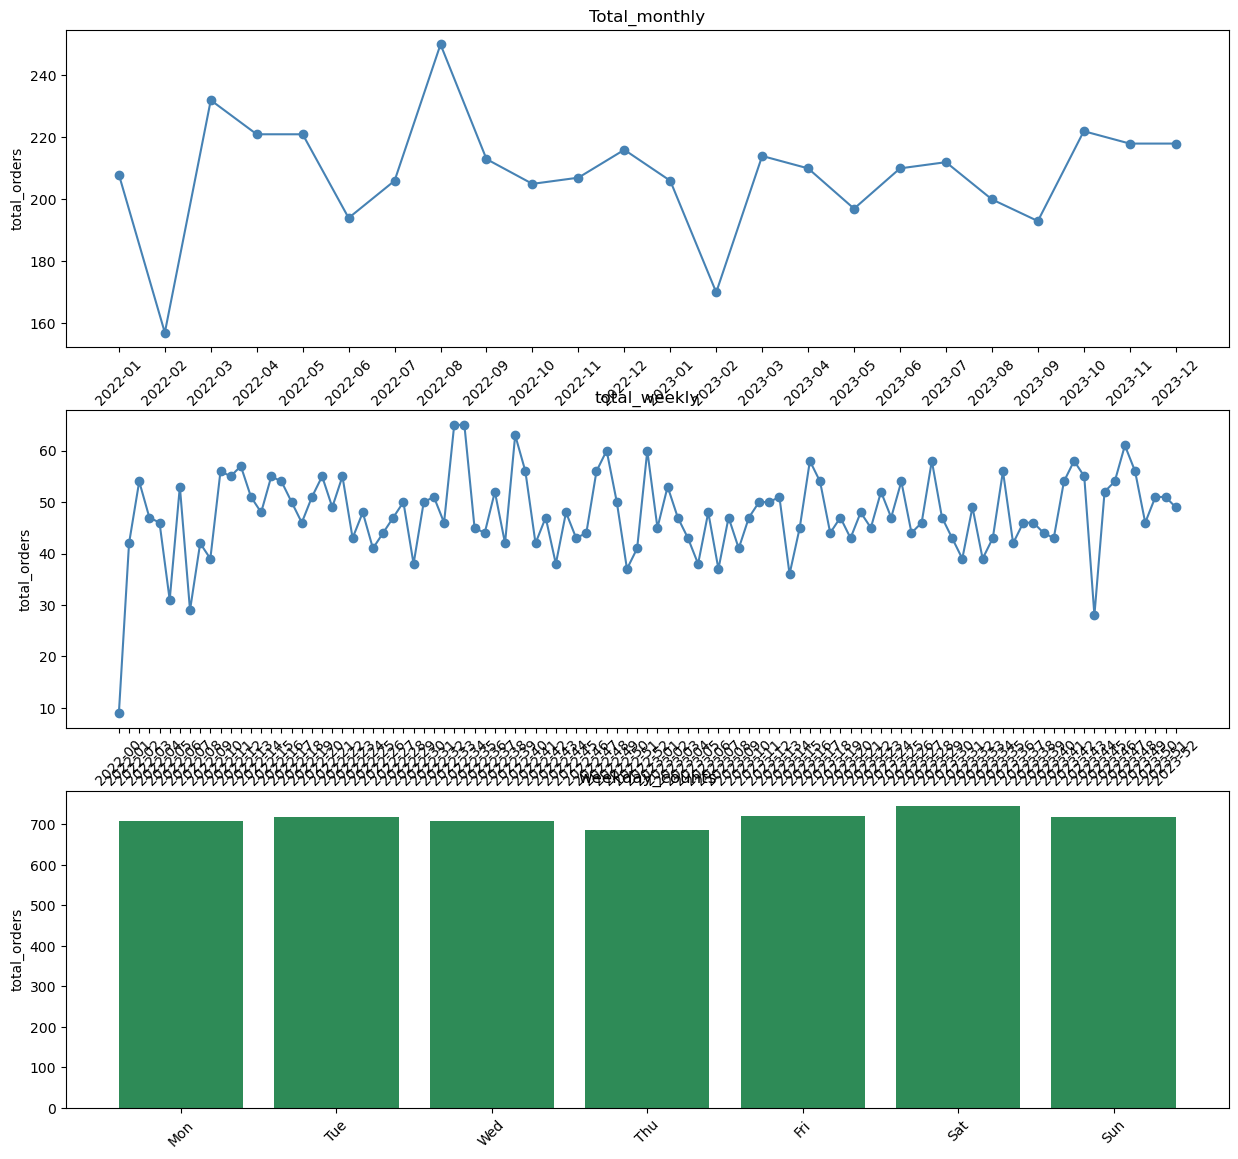

In [6]:
fig, axes = plt.subplots(3,1, figsize=(15,14))

# 월별 트렌드

axes[0].plot(total_monthly['year_month'].astype(str), total_monthly['total_orders'], marker='o',color='steelblue')
axes[0].set_title('Total_monthly')
axes[0].set_ylabel('total_orders')
axes[0].tick_params(axis='x', rotation=45)


# 주별 트렌드
axes[1].plot(total_weekly['year_week'].astype(str), total_weekly['total_orders'], marker='o',color='steelblue')
axes[1].set_title('total_weekly')
axes[1].set_ylabel('total_orders')
axes[1].tick_params(axis='x', rotation=45)

# 요일별 트렌드
axes[2].bar(weekday_counts['weekday_label'].astype(str), weekday_counts['total_orders'],color='seagreen')
axes[2].set_title('weekday_counts')
axes[2].set_ylabel('total_orders')
axes[2].tick_params(axis='x', rotation=45)

In [7]:
total_monthly

,year_month,total_orders
0,2022-01,208
1,2022-02,157
2,2022-03,232
3,2022-04,221
4,2022-05,221
5,2022-06,194
6,2022-07,206
7,2022-08,250
8,2022-09,213
9,2022-10,205


In [8]:
total_weekly

,year_week,total_orders
0,2022-00,9
1,2022-01,42
2,2022-02,54
3,2022-03,47
4,2022-04,46
...,...,...
100,2023-48,56
101,2023-49,46
102,2023-50,51
103,2023-51,51


In [9]:
weekday_counts

,weekday,total_orders,weekday_label
0,0,707,Mon
1,1,719,Tue
2,2,707,Wed
3,3,685,Thu
4,4,720,Fri
5,5,745,Sat
6,6,717,Sun


### RFM

In [10]:
from datetime import timedelta

# 기준일: 가장 마지막일 주문 +1
snapshot_date=df_orders['order_date'].max() + timedelta(days=1)

# rfm 계산
rfm=df_orders.groupby('customer_id').agg({
    'order_date' : lambda x :(snapshot_date -x.max()).days,
    'customer_id':'count', # 주문번호 대신 customer_id로 count
    'amount' :'sum' #합계
}).rename(columns = {
    'order_date':'Recency',
    'customer_id':'Frequency',
    'amount':'Monetary'
}).reset_index()

In [11]:
rfm

,customer_id,Recency,Frequency,Monetary
0,C0001,163,10,1153.44
1,C0002,19,10,1175.34
2,C0003,49,7,458.09
3,C0004,72,15,1336.49
4,C0005,45,17,1778.77
...,...,...,...,...
495,C0496,30,11,1062.86
496,C0497,69,12,763.50
497,C0498,166,8,1189.65
498,C0499,109,10,881.96


Text(0.5, 0, 'Purchase')

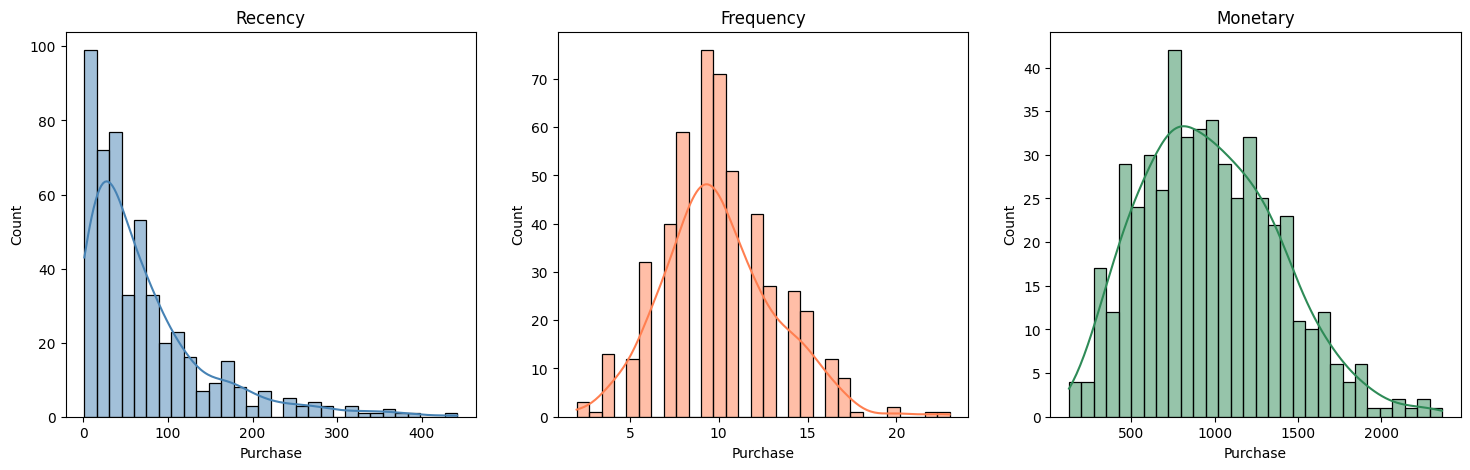

In [12]:
import seaborn as sns

plt.figure(figsize=(18,5))

# Recency
plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins = 30, kde=True, color='steelblue')
plt.title('Recency')
plt.xlabel('Purchase')

# Recency
plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins = 30, kde=True, color='coral')
plt.title('Frequency')
plt.xlabel('Purchase')

# Recency
plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins = 30, kde=True, color='seagreen')
plt.title('Monetary')
plt.xlabel('Purchase')

In [16]:
# 통계적인 분포 모형 불러오기
from scipy.stats import expon, poisson, gamma

# 평균 기반 파라미터 추정
lambda_r=1/rfm['Recency'].mean() #지수분포의 람다값 -> 지수분포의 평균=1/lambda
mu_f=rfm['Frequency'].mean() #포아송분포의 평균=lambda
a_m, loc_m, scale_m=gamma.fit(rfm['Monetary'], floc=0) #모양, 위치, 척도(척도는 0으로 고정)

# 확률 계산
rfm['recency_prob']=expon.cdf(rfm['Recency'], scale=1/ lambda_r)
rfm['frequency_prob']= poisson.pmf(rfm['Frequency'], mu=mu_f)
rfm['monetary_prob']= gamma.cdf(rfm['Monetary'], a=a_m, loc= loc_m, scale =scale_m)

In [17]:
rfm

,customer_id,Recency,Frequency,Monetary,recency_prob,frequency_prob,monetary_prob
0,C0001,163,10,1153.44,0.897498,0.125110,0.705377
1,C0002,19,10,1175.34,0.233192,0.125110,0.720591
2,C0003,49,7,458.09,0.495788,0.090079,0.088796
3,C0004,72,15,1336.49,0.634386,0.034718,0.815315
4,C0005,45,17,1778.77,0.466801,0.012764,0.950260
...,...,...,...,...,...,...,...
495,C0496,30,11,1062.86,0.342454,0.113736,0.636451
496,C0497,69,12,763.50,0.618732,0.094780,0.354819
497,C0498,166,8,1189.65,0.901706,0.112599,0.730225
498,C0499,109,10,881.96,0.781996,0.125110,0.473115


In [18]:
a_m

5.050496944898523

In [19]:
mu_f

np.float64(10.0)

In [20]:
scale_m

np.float64(192.68543088279267)

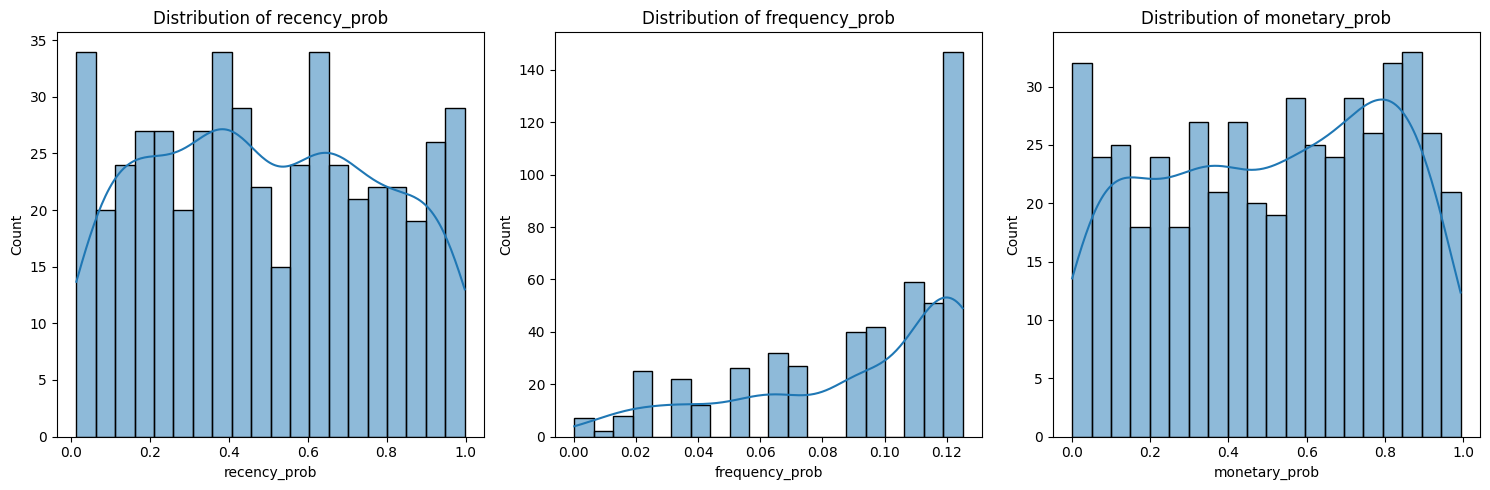

  customer_id  Recency  Frequency  Monetary  recency_prob  frequency_prob  \
0       C0001      163         10   1153.44      0.897498        0.125110   
1       C0002       19         10   1175.34      0.233192        0.125110   
2       C0003       49          7    458.09      0.495788        0.090079   
3       C0004       72         15   1336.49      0.634386        0.034718   
4       C0005       45         17   1778.77      0.466801        0.012764   
5       C0006       72          8   1123.28      0.634386        0.112599   
6       C0007       92         11    760.34      0.723535        0.113736   
7       C0008       18         11   1034.08      0.222401        0.113736   
8       C0009       53          9   1123.79      0.523200        0.125110   
9       C0010       72          7    535.74      0.634386        0.090079   

   monetary_prob R_Segment F_Segment M_Segment     RFM_Segment  
0       0.705377       Low      High      High   Low-High-High  
1       0.720591      

In [22]:
# 확률 분포 시각화
plt.figure(figsize=(15, 5))
for i, col in enumerate(['recency_prob', 'frequency_prob', 'monetary_prob']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(rfm[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 분위수 기반 세그먼트 나누기 (Low, Mid, High)
def segment_by_quantile(series):
    return pd.qcut(series, q=3, labels=['Low', 'Mid', 'High'])

# segment 설정
rfm['R_Segment'] = segment_by_quantile(1 - rfm['recency_prob'])  # 작을수록 좋은 고객 (최근에 방문했을수록 값이 크도록 1-prob으로 계산)
rfm['F_Segment'] = segment_by_quantile(rfm['frequency_prob'])    # 확률 높을수록 일반적인 빈도
rfm['M_Segment'] = segment_by_quantile(rfm['monetary_prob'])     # 금액 높을수록 좋음

# 조합 생성 (ex: High-Mid-Low)
rfm['RFM_Segment'] = (
    rfm['R_Segment'].astype(str) + '-' +
    rfm['F_Segment'].astype(str) + '-' +
    rfm['M_Segment'].astype(str)
)

# 8. 결과 출력 (필요 컬럼만 보기 좋게 정리)
print(rfm[['customer_id', 'Recency', 'Frequency', 'Monetary',
           'recency_prob', 'frequency_prob', 'monetary_prob',
           'R_Segment', 'F_Segment', 'M_Segment', 'RFM_Segment']].head(10))

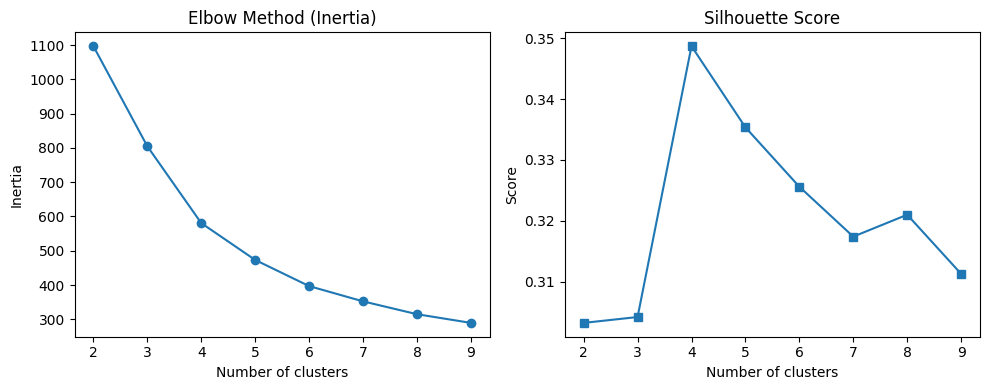

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 클러스터링 입력 변수
X = rfm[['recency_prob', 'frequency_prob', 'monetary_prob']]

# 스케일링 (K-Means는 거리 기반 → 스케일 표준화 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적 클러스터 수 결정 (Elbow method + Silhouette score)
inertia = []
silhouette = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# 8. Elbow plot으로 최적 군집 수 시각화
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette, marker='s')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

         recency_prob  frequency_prob  monetary_prob
Cluster                                             
0            0.649777        0.056495       0.122511
1            0.766811        0.112286       0.555311
2            0.246698        0.113615       0.479767
3            0.395929        0.043001       0.829778


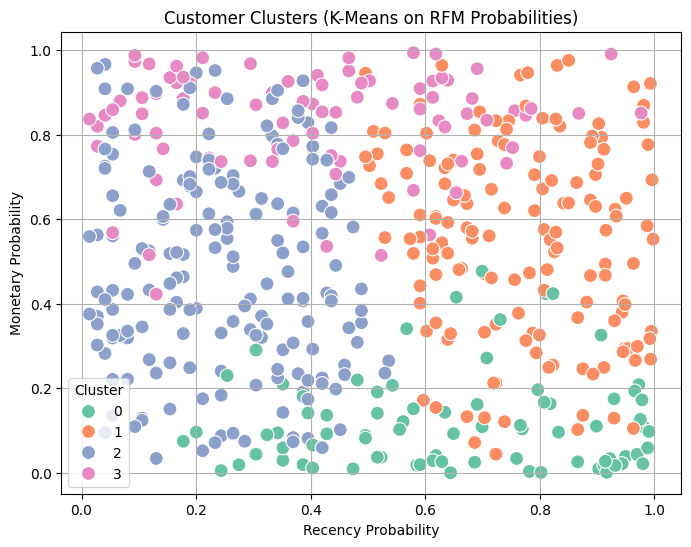

In [24]:
#  K-Means 모델 훈련 (예: k=4)
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm['Cluster'] = kmeans_final.fit_predict(X_scaled)

# 결과 확인 (클러스터별 특성 평균 보기)
cluster_summary = rfm.groupby('Cluster')[['recency_prob', 'frequency_prob', 'monetary_prob']].mean()
print(cluster_summary)

# 시각화 (예: 2D scatter)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='recency_prob', y='monetary_prob',
    hue='Cluster', data=rfm, palette='Set2', s=100
)
plt.title('Customer Clusters (K-Means on RFM Probabilities)')
plt.xlabel('Recency Probability')
plt.ylabel('Monetary Probability')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [25]:
# 클러스터별 R, F, M 값에 대한 통계량 집계
rfm_cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].agg(
    ['mean', 'median', 'min', 'max', 'std','count']
).round(2)

# 결과 출력
print("클러스터별 RFM 기초 통계 요약:\n")
print(rfm_cluster_summary)

클러스터별 RFM 기초 통계 요약:

        Recency                              Frequency                       \
           mean median min  max    std count      mean median min max   std   
Cluster                                                                       
0        104.74   74.5  14  334  80.81    80      6.01    6.0   2  15  2.24   
1        129.13  107.0  49  442  77.26   151      9.44    9.0   6  13  1.62   
2         21.59   20.0   1   55  13.92   178      9.85   10.0   6  13  1.52   
3         44.59   37.0   1  270  41.66    91     14.74   15.0   6  23  2.26   

              Monetary                                          
        count     mean   median     min      max     std count  
Cluster                                                         
0          80   467.76   468.90  125.71   885.96  171.66    80  
1         151  1011.81   989.37  373.24  1992.81  308.36   151  
2         178   921.20   855.86  346.67  1893.02  314.69   178  
3          91  1454.95  1418.14  83

In [26]:
snapshot_date

Timestamp('2023-12-31 00:00:00')